In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn import linear_model

#### Importing data and analyzing it

In [355]:
data=pd.read_csv('Desktop/drinks.csv', index_col='country')

This data set contains data on alcohol consumption per capita across countries in the world.It contains data on average alcohol consumption by country among those 15 and older, in 2010, separately by beverage type. Values provided are the average number of servings and total_litres_of_pure_alcohol.

In [356]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,AS
Albania,89,132,54,4.9,EU
Algeria,25,0,14,0.7,AF
Andorra,245,138,312,12.4,EU
Angola,217,57,45,5.9,AF


In [357]:
data.shape

(193, 5)

In [358]:
data.describe()  

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### Data Cleaning

##### Finding missing values

In [359]:
data.isna().sum()

beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [360]:
data['continent'].unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [361]:
data['continent'].value_counts() 

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

NA in data stands or North America, not a missing value,so by changing NA to NtA problem is solved

##### Finding data issues and handling

In [362]:
data['continent']=data['continent'].fillna('NtA')
data['continent'].value_counts()

AF     53
EU     45
AS     44
NtA    23
OC     16
SA     12
Name: continent, dtype: int64

In [363]:
data[data['continent']=='NtA']

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Antigua & Barbuda,102,128,45,4.9,NtA
Bahamas,122,176,51,6.3,NtA
Barbados,143,173,36,6.3,NtA
Belize,263,114,8,6.8,NtA
Canada,240,122,100,8.2,NtA
Costa Rica,149,87,11,4.4,NtA
Cuba,93,137,5,4.2,NtA
Dominica,52,286,26,6.6,NtA
Dominican Republic,193,147,9,6.2,NtA


In [364]:
data['continent'].isna().sum()

0

##### Making numbers to same type

In [365]:
data['total_litres_of_pure_alcohol']=data['total_litres_of_pure_alcohol'].astype(int)

#### Finding the most alcoholic countries)))

In [366]:
data.max()

beer_servings                   376
spirit_servings                 438
wine_servings                   370
total_litres_of_pure_alcohol     14
continent                        SA
dtype: object

Here are top 10 countries, with highest usage of pure alcohol

In [367]:
data.sort_values(by=['total_litres_of_pure_alcohol'], ascending=False).head(10)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Belarus,142,373,42,14,EU
Andorra,245,138,312,12,EU
Lithuania,343,244,56,12,EU
France,127,151,370,11,EU
Portugal,194,67,339,11,EU
Russian Federation,247,326,73,11,AS
Hungary,234,215,185,11,EU
Grenada,199,438,28,11,NtA
Slovakia,196,293,116,11,EU


Let's find alcohol preferences by countries

In [368]:
max_values=data[data.columns.difference(['continent'])].max()
index_list=list(max_values.index)
value_list=list(max_values.values)
countries=list()
for i in range(0, len(max_values)):
    a=data[data[index_list[i]]==int(value_list[i])]
    countries=countries+list(a[index_list[i]].index)

In [369]:
max_alcohol=pd.DataFrame(list(zip(countries,value_list)), index=index_list, columns=['Country', 'Value'] )
max_alcohol

,Country,Value
beer_servings,Namibia,376
spirit_servings,Grenada,438
total_litres_of_pure_alcohol,Belarus,14
wine_servings,France,370


###### So, beer servings are more preferred in Namibia, spirit servings in Grenada, wine servings in France.  And as it was supposed to be, total litres of pure alcohol used is greatest in Belarus.


Here are the countries with wine usage more than average

In [370]:
data[data['wine_servings'] > data['wine_servings'].mean()].sort_values(['wine_servings'], ascending=False).head(10)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
France,127,151,370,11,EU
Portugal,194,67,339,11,EU
Andorra,245,138,312,12,EU
Switzerland,185,100,280,10,EU
Denmark,224,81,278,10,EU
Slovenia,270,51,276,10,EU
Luxembourg,236,133,271,11,EU
Croatia,230,87,254,10,EU
Italy,85,42,237,6,EU


#### Grouping

In [371]:
data_grouped=data.groupby('continent').mean().astype(int)

In [372]:
data_grouped.sort_values(by=['beer_servings'], ascending=False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,193,132,142,8
SA,175,114,62,5
NtA,145,165,24,5
OC,89,58,35,3
AF,61,16,16,2
AS,37,60,9,1


In [373]:
data_grouped.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,6.000000,6.000000,6.000000,6.000000
mean,116.666667,90.833333,48.000000,4.000000
std,63.629134,55.427129,49.642724,2.529822
min,37.000000,16.000000,9.000000,1.000000
25%,68.000000,58.500000,18.000000,2.250000
50%,117.000000,87.000000,29.500000,4.000000
75%,167.500000,127.500000,55.250000,5.000000
max,193.000000,165.000000,142.000000,8.000000


In [374]:
data_grouped.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.801052,0.795258,0.956698
spirit_servings,0.801052,1.000000,0.467954,0.765935
wine_servings,0.795258,0.467954,1.000000,0.891810
total_litres_of_pure_alcohol,0.956698,0.765935,0.891810,1.000000


We can see pretty strong correlation between drinks.

#### Some visualisation

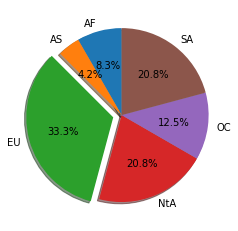

In [389]:
plt.pie(list(data_grouped['total_litres_of_pure_alcohol'].values), labels = list(data_grouped.index), startangle = 90, shadow = True, explode = (0, 0, 0.1, 0, 0,0), autopct = "%1.1f%%")
plt.show()

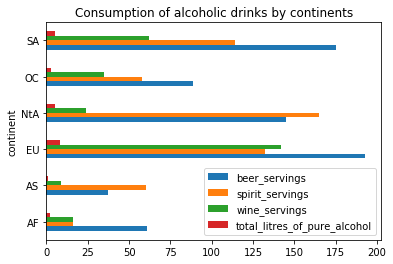

In [390]:
data_grouped.plot(kind='barh', title = 'Consumption of alcoholic drinks by continents')

Text(0.5, 1, 'Connection between  spirit servings and wine servings ')

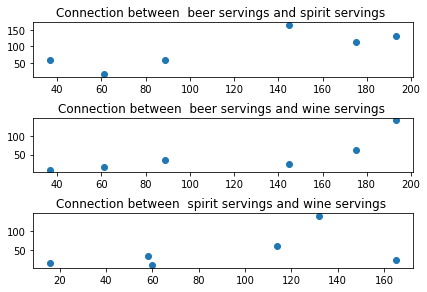

In [377]:
fig, axs = plt.subplots(3)
fig.tight_layout(h_pad = 2)

axs[0].scatter(data_grouped['beer_servings'], data_grouped['spirit_servings'])
axs[0].set_title('Connection between  beer servings and spirit servings ')
axs[1].scatter(data_grouped['beer_servings'], data_grouped['wine_servings'])
axs[1].set_title('Connection between  beer servings and wine servings ')
axs[2].scatter(data_grouped['spirit_servings'], data_grouped['wine_servings'])
axs[2].set_title('Connection between  spirit servings and wine servings ')

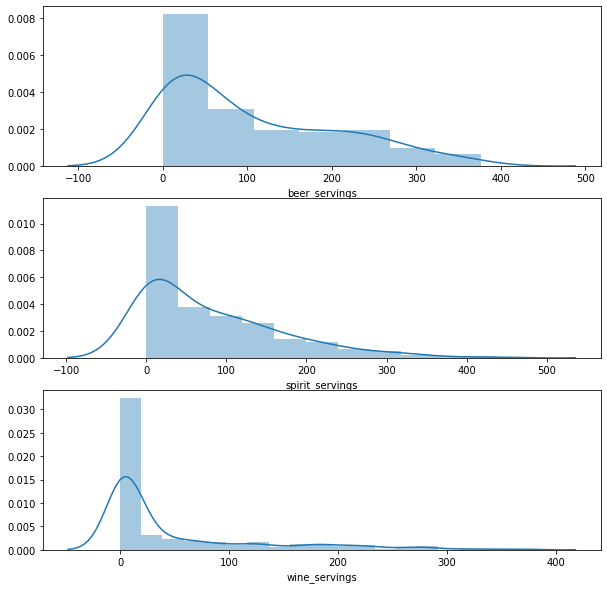

In [399]:
fig, axs = plt.subplots(3,figsize=(10, 10))

sns.distplot(data['beer_servings'], ax=axs[0])
sns.distplot(data['spirit_servings'], ax=axs[1])
sns.distplot(data['wine_servings'],ax=axs[2])

#### Hypothesis testing

H0: the means of beer_servings and spirit_serving are equal.
H1: the means of beer_servings and spirit_serving are not unequal.

In [387]:
stat, p_val = ttest_ind(data['beer_servings'], data['spirit_servings'])
print('p-value is %s' % round(p_val,2))
if p_val < 0.05:
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

p-value is 0.01
We are rejecting null hypothesis


#### Linear Regression

In [346]:
y=data['total_litres_of_pure_alcohol']
x=data[data.columns.difference(['continent', 'total_litres_of_pure_alcohol'])]
regr = linear_model.LinearRegression()
regr.fit(x,y)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.01830291 0.01555814 0.01600524]


We can see, that beer servings, spirit servings and wine servings have approximately same impact on total litres of pure alcohol.

#### Mane Mikayelyan